---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [3]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [40]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    X, y = df.drop('Class', axis=1), df.Class;
    
    result = len(y[y==1]) / (len(y[y==1]) + len(y[y==0]))
    return result
answer_one()

0.016410823768035772

In [7]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [9]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)

    return accuracy_score(y_test, y_dummy_predictions), recall_score(y_test, y_dummy_predictions)
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [10]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    svm_predicted_mc = svm.predict(X_test)

    return accuracy_score(y_test, svm_predicted_mc), recall_score(y_test, svm_predicted_mc), precision_score(y_test, svm_predicted_mc)
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [11]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(gamma=1e-07,C=1e9).fit(X_train, y_train)
    svm_predicted_mc = svm.decision_function(X_test) > -220
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    
    return confusion_mc
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

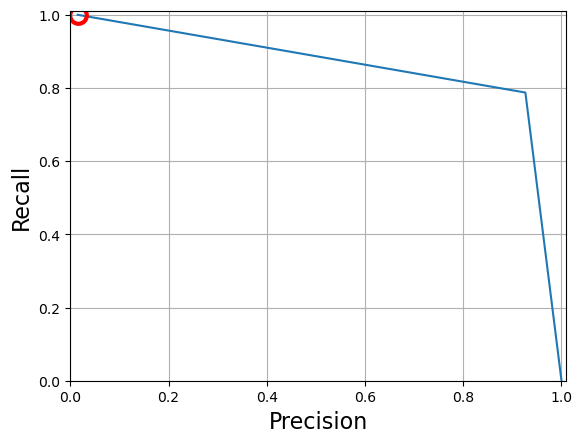

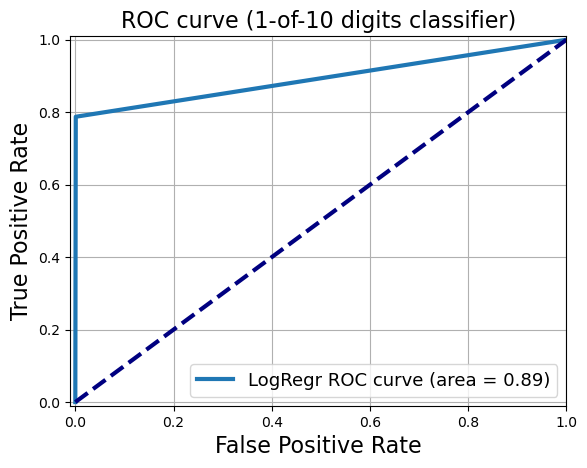

(0.83, 0.94)

In [42]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)

    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.grid()
    plt.show()

    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.grid()
    plt.show()

    recall = 0.83
    TPR = 0.94
    
    return recall, TPR

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [44]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    clf = LogisticRegression()
    grid_values = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

    grid_search = GridSearchCV(clf, param_grid=grid_values, scoring='recall')
    grid_search.fit(X_train, y_train)
    cv_result = grid_search.cv_results_
    mean_test_score = cv_result['mean_test_score']

    result = np.array(mean_test_score).reshape(4,2)
    
    return result
answer_six()

array([[       nan, 0.80064935],
       [       nan, 0.80428571],
       [       nan, 0.80422078],
       [       nan, 0.80792208]])

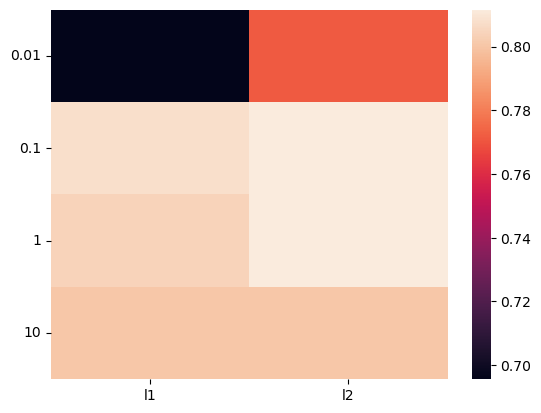

In [35]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())